In [2]:
# Import necessary libraries
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Input
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the dataset
url = "https://storage.googleapis.com/tensorflow/tf-keras-datasets/jena_climate_2009_2016.csv.zip"
df = pd.read_csv(url, compression='zip')

# Select the 'T (degC)' column for temperature prediction
temperature = df['T (degC)'].values

# Normalize the data
mean = temperature[:200000].mean()
std = temperature[:200000].std()
temperature = (temperature - mean) / std

# Prepare input sequences and labels
def create_sequences(data, seq_length):
    x = []
    y = []
    for i in range(len(data) - seq_length):
        x.append(data[i:i+seq_length])
        y.append(data[i+seq_length])
    return np.array(x), np.array(y)

seq_length = 144  # 6 hours of data (144 10-minute intervals)
X, y = create_sequences(temperature, seq_length)

# Split into training and test sets
split = int(0.8 * len(X))
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]

# Debugging: Check the shape of the datasets
print(f"Shape of X_train: {X_train.shape}")
print(f"Shape of y_train: {y_train.shape}")
print(f"Shape of X_test: {X_test.shape}")
print(f"Shape of y_test: {y_test.shape}")

# Reshape the data to fit the LSTM input shape
X_train = np.expand_dims(X_train, axis=-1)
X_test = np.expand_dims(X_test, axis=-1)

# Debugging: Recheck the shape after expanding dimensions
print(f"Shape of X_train after reshaping: {X_train.shape}")
print(f"Shape of X_test after reshaping: {X_test.shape}")



Shape of X_train: (336325, 144)
Shape of y_train: (336325,)
Shape of X_test: (84082, 144)
Shape of y_test: (84082,)
Shape of X_train after reshaping: (336325, 144, 1)
Shape of X_test after reshaping: (84082, 144, 1)


In [3]:
# Define the model
model = Sequential()
model.add(Input(shape=(seq_length, 1)))  # Using Input layer to define input shape
model.add(LSTM(units=64))
model.add(Dense(units=1))


In [4]:
# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model with specified epochs
history = model.fit(X_train, y_train, epochs=10, batch_size=64, validation_data=(X_test, y_test))


Epoch 1/10
5256/5256 ━━━━━━━━━━━━━━━━━━━━ 8257s 2s/step - loss: 0.0119 - val_loss: 6.5858e-04
Epoch 2/10
5256/5256 ━━━━━━━━━━━━━━━━━━━━ 410s 78ms/step - loss: 5.8183e-04 - val_loss: 5.5418e-04
Epoch 3/10
5256/5256 ━━━━━━━━━━━━━━━━━━━━ 412s 78ms/step - loss: 5.5338e-04 - val_loss: 6.7346e-04
Epoch 4/10
5256/5256 ━━━━━━━━━━━━━━━━━━━━ 424s 81ms/step - loss: 5.4120e-04 - val_loss: 6.3231e-04
Epoch 5/10
5256/5256 ━━━━━━━━━━━━━━━━━━━━ 374s 71ms/step - loss: 5.3515e-04 - val_loss: 6.3801e-04
Epoch 6/10
5256/5256 ━━━━━━━━━━━━━━━━━━━━ 366s 70ms/step - loss: 5.2054e-04 - val_loss: 5.4359e-04
Epoch 7/10
5256/5256 ━━━━━━━━━━━━━━━━━━━━ 379s 72ms/step - loss: 5.1890e-04 - val_loss: 5.2644e-04
Epoch 8/10
5256/5256 ━━━━━━━━━━━━━━━━━━━━ 376s 72ms/step - loss: 5.2273e-04 - val_loss: 5.4654e-04
Epoch 9/10
5256/5256 ━━━━━━━━━━━━━━━━━━━━ 351s 67ms/step - loss: 5.2025e-04 - val_loss: 5.3600e-04
Epoch 10/10
5256/5256 ━━━━━━━━━━━━━━━━━━━━ 380s 72ms/step - loss: 5.1714e-04 - val_loss: 5.2533e-04


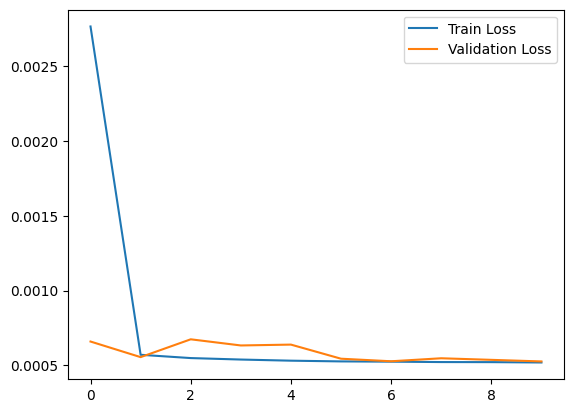

In [5]:
# Plot training & validation loss
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.show()

In [6]:
# Predict on test data
y_pred = model.predict(X_test)

2628/2628 ━━━━━━━━━━━━━━━━━━━━ 62s 23ms/step


In [7]:
# Rescale the predicted and actual values back to original temperature scale
y_test_rescaled = y_test * std + mean
y_pred_rescaled = y_pred * std + mean

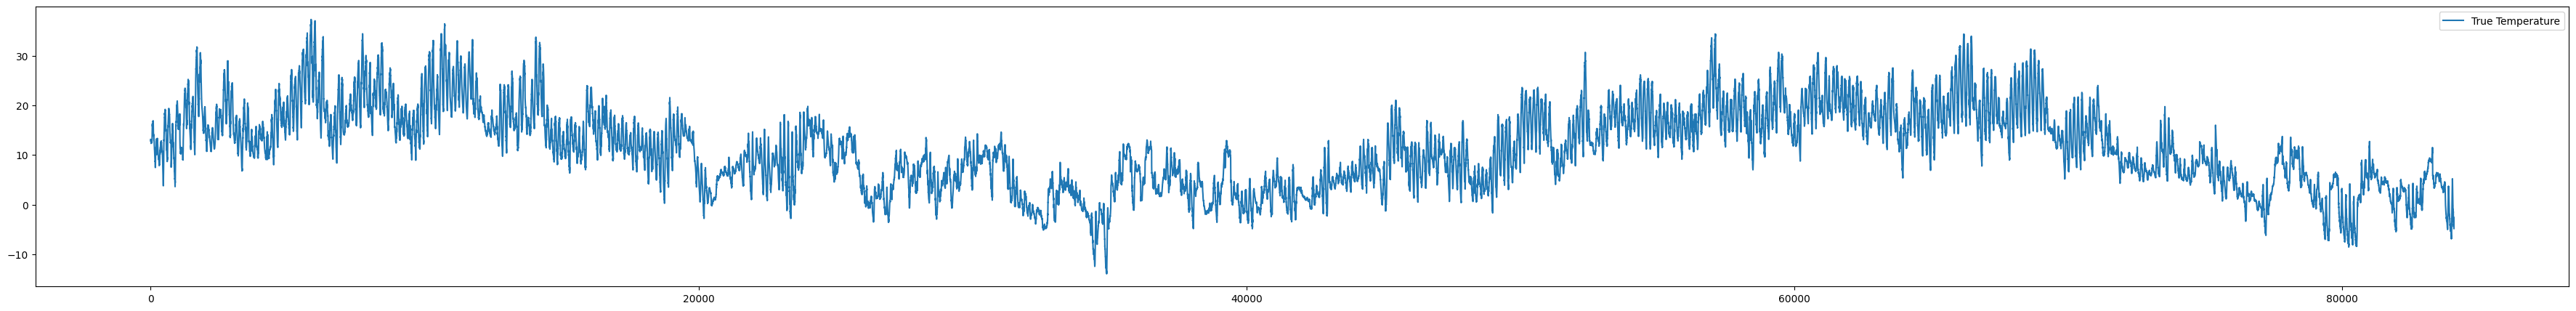

In [11]:
# Plot the results
plt.figure(figsize=(45,5))
plt.plot(y_test_rescaled, label='True Temperature')
plt.legend()
plt.show()

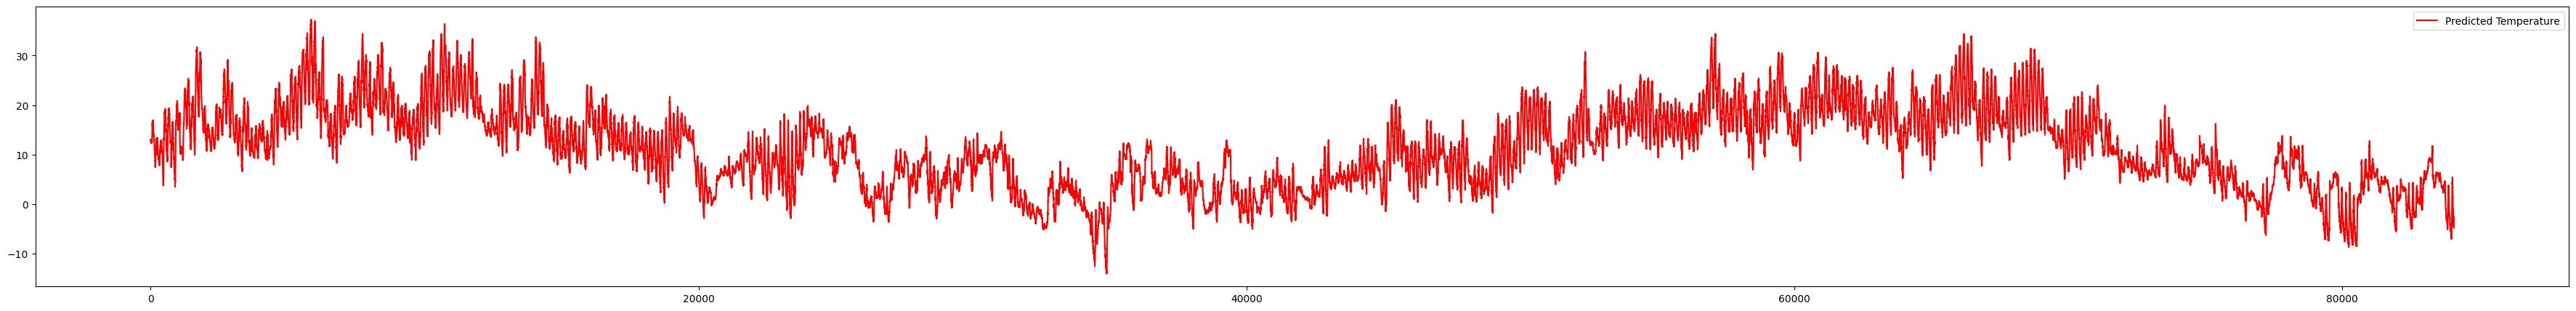

In [14]:
plt.figure(figsize=(45,5))
plt.plot(y_pred_rescaled, label='Predicted Temperature',color = 'red')
plt.legend()
plt.show()